In [26]:
import pandas as pd
import random 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


plt.rcParams["figure.figsize"] = (10,8) 

# Normalización

### En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

- Sobre la variable respuesta, en el pair programmings anterior identificastéis si seguía una distribución normal o no. 
- En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste
- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [27]:
df = pd.read_pickle("../datos/possum_limpio.pkl")

In [28]:
df.head(2)

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


In [29]:
df.reset_index(inplace=True)
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,100,7,other,m,1,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
97,101,7,other,m,1,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
98,102,7,other,f,6,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
99,103,7,other,m,4,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


##### Nuestra variable respuesta elegida es "totlngth" que hace referencia al largo total de nuestros sujetos. Ya teníamos analizada su distribución y sabemos que es normal ya que lo hemos confirmado de manera visual (a través de un histograma y un QQ-plot) y de forma analítica a través del Test de Shapiro. 

### Repetimos los análisis ya mencionados:

In [30]:
# test de shapiro --> p-valor superior a 0,05 aceptamos la H0, nuestra distribución es normal. 

stats.shapiro(df["totlngth"])

ShapiroResult(statistic=0.9848750829696655, pvalue=0.3044828474521637)

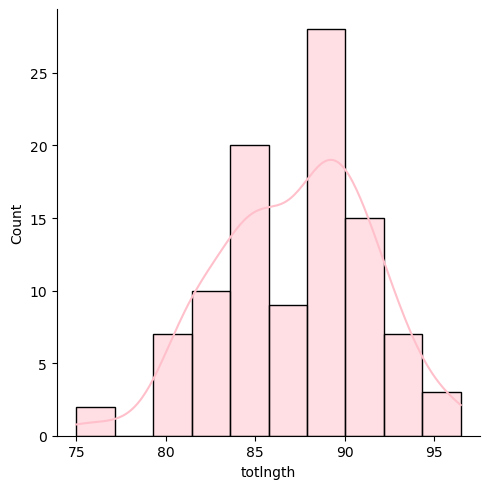

In [31]:
# representación visual de la distribución, mediante un displot. 
sns.displot(df["totlngth"], kde = True, color = "pink")
plt.show();


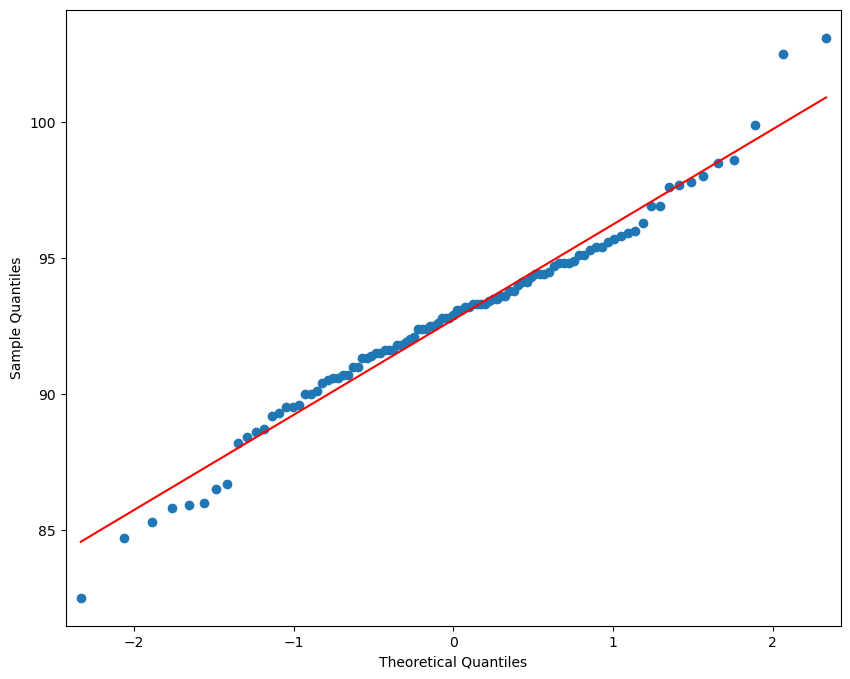

In [32]:
# Representación visual mediante QQ-plot

sm.qqplot(df['hdlngth'], line= 's')
plt.show()

# Estandarización

### En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

- Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.

- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [33]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,case,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,2,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [34]:
numericas.columns

Index(['case', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth',
       'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [35]:
numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
case,101.0,52.762376,30.573894,1.0,26.0,54.0,79.0,104.0
age,101.0,3.821782,1.915182,1.0,2.0,3.0,5.0,9.0
hdlngth,101.0,92.730693,3.518714,82.5,90.7,92.9,94.8,103.1
skullw,101.0,56.960396,3.102679,50.0,55.0,56.4,58.1,68.6
totlngth,101.0,87.269307,4.196802,75.0,84.5,88.0,90.0,96.5
taill,101.0,37.049505,1.971681,32.0,36.0,37.0,38.0,43.0
footlgth,101.0,68.398020,4.413502,60.3,64.5,67.9,72.5,77.9
earconch,101.0,48.133663,4.060352,41.3,44.8,46.8,52.0,56.2
eye,101.0,15.050495,1.058643,12.8,14.4,14.9,15.7,17.8
chest,101.0,27.064356,2.020722,22.0,25.5,27.0,28.0,32.0


##### Estandarizar generalmente significa cambiar los valores de nuestras columnas de manera que la desviación estándar de la distribución sea igual a 1 y la media igual a 0. Esto lo hacemos para que al ajustar nuestro modelo, la variación se deba al efecto de la variable y no a la escala en la que se encuentra. 
##### En *machine learning* esta aproximación se suele aplicar a las variables predictoras, es decir, lo que haremos será estandarizar todas nuestras variables predictoras (las que usaremos para intentar predecir determinado comportamiento). 

A modo de práctica, vamos a aplicar dos métodos de estandarización. El primero será manual y lo realizaremos sólo para nuestra variable 'hdlnght' aplicando la fórmula directamente. El segundo lo haremos para todas nuestras variables numéricas utilizando el método Sklearn StandardScaler.

In [36]:
# Estandarización manual de la variable predictora "hdlngth"

# vamos a crear distintas variables con los estadísticos que necesitamos, media y desviacion estándar

media = numericas['hdlngth'].mean()
desviacion = numericas['hdlngth'].std() 

numericas['hdlngth_esta'] = (numericas['hdlngth'] - media) / desviacion


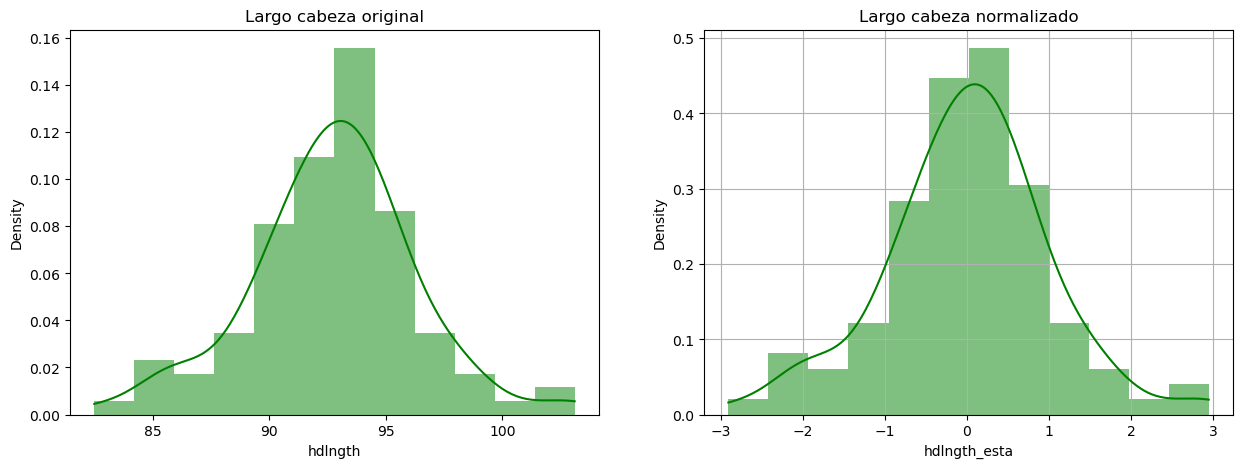

In [37]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Largo cabeza original')
axes[1].set_title('Largo cabeza normalizado')

sns.histplot(numericas['hdlngth'], ax = axes[0], color="green",  kde=True, stat="density", linewidth=0)
sns.histplot(numericas['hdlngth_esta'], ax = axes[1], color="green",  kde=True, stat="density", linewidth=0)

plt.grid()
plt.show();

In [38]:
# Recordemos que cuando estamos estadarizando lo que estamos haciendo es que la media de los datos sea igual a 0 
# y la desviación igual a 1. Chequeemos si eso es cierto: 

print(f'La media de la columna hdlngth_esta es:  {np.round(numericas["hdlngth_esta"].mean(),1)}')
print(f'La desviación estándar de la columna hdlngth_esta es: {np.round(numericas["hdlngth_esta"].std(),1)}')

La media de la columna hdlngth_esta es:  -0.0
La desviación estándar de la columna hdlngth_esta es: 1.0


In [39]:
# iniciamos el método para escalar

scaler = StandardScaler()

In [40]:

numericas.drop(['totlngth'], axis = 1, inplace = True)

numericas.head(2)

,case,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly,hdlngth_esta
0,1,8,94.1,60.4,36.0,74.5,54.5,15.2,28.0,36.0,0.389150
1,2,6,92.5,57.6,36.5,72.5,51.2,16.0,28.5,33.0,-0.065562


In [41]:
scaler.fit(numericas)

StandardScaler()

In [42]:
# transformamos los datos

X_escaladas = scaler.transform(numericas)

In [43]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,case,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly,hdlngth_esta
0,-1.701469,2.192511,0.391091,1.114121,-0.534944,1.389467,1.575748,0.141928,0.465334,1.238441,0.391091
1,-1.668599,1.143015,-0.065889,0.207174,-0.280089,0.934052,0.758956,0.901381,0.714004,0.133146,-0.065889


In [44]:
for columna in numericas_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_estandar[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna case es:  0.0
La desviación estándar de la columna case es: 1.0049875621120892
-------------------------------------------------------------
La media de la columna age es:  1.6818229976994946e-16
La desviación estándar de la columna age es: 1.0049875621120887
-------------------------------------------------------------
La media de la columna hdlngth es:  -2.0426454807026706e-15
La desviación estándar de la columna hdlngth es: 1.004987562112089
-------------------------------------------------------------
La media de la columna skullw es:  3.5692021395622604e-15
La desviación estándar de la columna skullw es: 1.0049875621120887
-------------------------------------------------------------
La media de la columna taill es:  3.649445981936158e-16
La desviación estándar de la columna taill es: 1.0049875621120894
-------------------------------------------------------------
La media de la columna footlgth es:  3.358974264849824e-15
La desviación estándar de la columna

In [45]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [46]:
numericas_estandar.columns

Index(['case', 'age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch',
       'eye', 'chest', 'belly', 'hdlngth_esta'],
      dtype='object')

In [47]:
df[['age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye',
       'chest', 'belly']] = numericas_estandar[['age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye',
       'chest', 'belly']]

In [48]:
df.head(2)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,2.192511,0.391091,1.114121,89.0,-0.534944,1.389467,1.575748,0.141928,0.465334,1.238441
1,2,1,Vic,f,1.143015,-0.065889,0.207174,91.5,-0.280089,0.934052,0.758956,0.901381,0.714004,0.133146


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   case      101 non-null    int64   
 1   site      101 non-null    category
 2   Pop       101 non-null    object  
 3   sex       101 non-null    object  
 4   age       101 non-null    float64 
 5   hdlngth   101 non-null    float64 
 6   skullw    101 non-null    float64 
 7   totlngth  101 non-null    float64 
 8   taill     101 non-null    float64 
 9   footlgth  101 non-null    float64 
 10  earconch  101 non-null    float64 
 11  eye       101 non-null    float64 
 12  chest     101 non-null    float64 
 13  belly     101 non-null    float64 
dtypes: category(1), float64(10), int64(1), object(2)
memory usage: 10.8+ KB


In [50]:
# guardamos nuestros datos estandarizados para seguir con el análisis y el modelo. 

df.to_pickle("../datos/possum_standar.pkl")
